In [1]:
from pyneurovault import api
import pandas as pd

In [2]:


# Get a collection
collections = api.get_collections()

Extracting NeuroVault collections meta data...
http://neurovault.org/api/collections/?limit=100&format=json
Found 872 results.
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=100
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=200
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=300
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=400
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=500
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=600
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=700
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=800


In [3]:
collections_with_DOIs = list(collections[pd.notnull(collections.DOI)].collection_id)

In [35]:
len(images)

8312

In [4]:
images = api.get_images_with_collections(collection_pks=collections_with_DOIs)

Extracting NeuroVault collections meta data...
Retrieving collection 35...
http://neurovault.org/api/collections/35/?format=json
Retrieving collection 1054...
http://neurovault.org/api/collections/1054/?format=json
Retrieving collection 1345...
http://neurovault.org/api/collections/1345/?format=json
Retrieving collection 109...
http://neurovault.org/api/collections/109/?format=json
Retrieving collection 1194...
http://neurovault.org/api/collections/1194/?format=json
Retrieving collection 1056...
http://neurovault.org/api/collections/1056/?format=json
Retrieving collection 865...
http://neurovault.org/api/collections/865/?format=json
Retrieving collection 1039...
http://neurovault.org/api/collections/1039/?format=json
Retrieving collection 866...
http://neurovault.org/api/collections/866/?format=json
Retrieving collection 1195...
http://neurovault.org/api/collections/1195/?format=json
Retrieving collection 588...
http://neurovault.org/api/collections/588/?format=json
Retrieving collecti

In [5]:
images_f = images[images.analysis_level.isin(['single-subject', 'meta-analysis']) != True]
images_f = images_f[images_f.is_thresholded != True]
images_f = images_f[images_f.not_mni != True]
images_f = images_f[images_f.map_type.isin(['ROI/mask', 'parcellation', 'anatomical']) != True]
images_f = images_f[images_f.modality.isin(['fMRI-CBF', 'Diffusion MRI', 'Structural MRI']) != True]
images_f = images_f[pd.notnull(images_f.thumbnail)]
images_f = images_f[pd.isnull(images_f.label_description_file)]
images_f = images_f[pd.notnull(images_f.cognitive_paradigm_cogatlas)]
images_f = images_f[images_f.cognitive_paradigm_cogatlas.isin(['rest eyes open', 'rest eyes closed', 'None / Other']) != True]

In [6]:
pd.unique(images_f.modality)

array([u'fMRI-BOLD'], dtype=object)

In [7]:
images_f

,AGE,Action Observation,Acupuncture,Anti-Saccades,Braille Reading,Breath-Holding,CIAS,Chewing/Swallowing,Classical Conditioning,Counting/Calculation,...,used_high_pass_filter,used_intersubject_registration,used_motion_correction,used_motion_regressors,used_motion_susceptibiity_correction,used_orthogonalization,used_reaction_time_regressor,used_slice_timing_correction,used_smoothing,used_temporal_derivatives
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,True,None,None,None,None,None,None,True,None
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None


In [8]:
files = !ls thumbnails/

In [9]:
len(files)

624

In [11]:
import urllib, os
DOWNLOADS_DIR = "thumbnails"
#!mkdir {DOWNLOADS_DIR}
for url in images_f.thumbnail:
    name = url.rsplit('/', 1)[-1]
    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)
    if not os.path.isfile(filename):
        urllib.urlretrieve(url, filename)

Manuall quality control happens here

In [11]:
filenames = !ls thumbnails/
ids = [int(fname.split(".")[0].split("_")[2]) for fname in filenames]
images_f = images_f[images_f.image_id.isin(ids)]
len(images_f), len(pd.unique(images_f.collection_id))

(625, 79)

In [34]:
len(s)

87

In [32]:
s = images_f.groupby("cognitive_paradigm_cogatlas").count().map_type
for item in s.iteritems():
    print item[1], item[0].replace(" ", "~")

11 Bistable~percept~paradigm
1 Counting/Calculation
2 Covert~verb~generation~task
6 Eriksen~flanker~task
26 Incidental~encoding~task
5 Landmark~task
1 Overt~word~repetition
7 Probabilistic~classification~task
1 Sentence/nonword~language~localizer
2 Single~item~food~choice~task
1 Speech~Detection
3 Tapping~task
3 Two~item~food~choice~task
11 abstract/concrete~task
1 action~observation~task
4 associative~memory~encoding~task
7 auditory~scene~perception
17 balloon~analogue~risk~task~(BART)
6 classification~probe~without~feedback
4 color-word~stroop~with~task~switching
10 conditional~stop~signal~task
10 consensus~decision-making~task
11 contextual~semantic~priming~task
4 cue~approach~task
1 delayed~intention~task
2 deterministic~classification
6 dot~motion~task
1 dual-task~paradigm
2 dual-task~weather~prediction
3 eating/drinking
25 electric~stimulation
8 emotion~processing~fMRI~task~paradigm
43 emotional~regulation~task
2 encoding~task
3 episodic~recall
16 face~matching~task
9 false~belie

In [11]:
outfolder = "images"

api.download_images(dest_dir=outfolder, images_df=images_f, resample=False)

,Action Observation,Acupuncture,Anti-Saccades,Braille Reading,Breath-Holding,CIAS,Chewing/Swallowing,Classical Conditioning,Counting/Calculation,Cued Explicit Recognition,...,used_high_pass_filter,used_intersubject_registration,used_motion_correction,used_motion_regressors,used_motion_susceptibiity_correction,used_orthogonalization,used_reaction_time_regressor,used_slice_timing_correction,used_smoothing,used_temporal_derivatives
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,True,None,None,None,None,None,None,True,None
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,None,True,True,None,False,False,True,True,None


In [2]:
from nilearn.image import resample_img, smooth_img
from nilearn.plotting import plot_glass_brain
%matplotlib inline
import nibabel as nb
import numpy as np
from scipy.ndimage import binary_fill_holes, binary_dilation
from scipy import stats

In [8]:
filenames = !ls /data/images/original/*.nii.gz
[int(f.split("/")[-1].split(".")[0]) for f in filenames]

[3,
 4,
 5,
 56,
 57,
 58,
 106,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 130,
 131,
 132,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 299,
 300,
 301,
 303,
 304,
 305,
 307,
 308,
 309,
 310,
 311,
 330,
 331,
 332,
 333,
 341,
 342,
 343,
 344,
 345,
 346,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 561,
 562,
 563,
 564,
 565,
 566,
 655,
 656,
 657,
 658,
 659,
 735,
 743,
 744,
 753,
 754,
 755,
 756,
 757,
 758,
 763,
 764,
 777,
 779,
 780,
 781,
 

In [9]:
filenames = !ls /data/images/original/*.nii.gz
standard_mask = "/usr/share/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz"
standard = "/usr/share/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz"
standard_mask_data = nb.load(standard_mask).get_data()
new_standard_mask_data = binary_fill_holes(standard_mask_data)
new_standard_mask_data = binary_dilation(new_standard_mask_data, iterations=3)

!mkdir -p /data/images/resampled
!mkdir -p /data/images/resampled_masks

for image_id in [int(f.split("/")[-1].split(".")[0]) for f in filenames]:
    fname = "%04d.nii.gz"%image_id
    print "resampling " + fname
    nii = nb.load("/data/images/original/" + fname)
    data = nii.get_data()
    zero_mask = (data == 0)
    nan_mask = (np.isnan(data))
    missing_mask = zero_mask | nan_mask
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    data[missing_mask] = np.nan
    new_nii = nb.Nifti1Image(data, nii.affine, nii.header)

    target_nii = nb.load(standard)
    resampled_nii = resample_img(new_nii,target_affine=target_nii.get_affine(), 
                                 target_shape=target_nii.shape)
    resampled_data = resampled_nii.get_data()
    zero_mask = (resampled_data == 0)
    nan_mask = (np.isnan(resampled_data))
    missing_mask = zero_mask | nan_mask
    missing_mask[new_standard_mask_data == 0] = True
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    resampled_data[missing_mask] = np.nan
    resampled_data[missing_mask != True] = stats.zscore(resampled_data[missing_mask != True])
    resampled_nii = nb.Nifti1Image(resampled_data, resampled_nii.affine, resampled_nii.header)
    resampled_mask_nii = nb.Nifti1Image(missing_mask != True, resampled_nii.affine, resampled_nii.header)
    resampled_nii.to_filename("/data/images/resampled/" + fname)
    resampled_mask_nii.to_filename("/data/images/resampled_masks/" + fname)

resampling 0003.nii.gz


/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0


resampling 0004.nii.gz
resampling 0005.nii.gz
resampling 0056.nii.gz
resampling 0057.nii.gz
resampling 0058.nii.gz
resampling 0106.nii.gz


/opt/conda/envs/python2/lib/python2.7/site-packages/nilearn/image/resampling.py:491: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  copy=not input_img_is_string)
/opt/conda/envs/python2/lib/python2.7/site-packages/nilearn/masking.py:94: RuntimeWarning: invalid value encountered in divide
  / np.sum(np.isfinite(extrapolation), axis=0))
/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:435: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter will change in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


resampling 0109.nii.gz
resampling 0110.nii.gz
resampling 0111.nii.gz
resampling 0112.nii.gz
resampling 0113.nii.gz
resampling 0115.nii.gz
resampling 0116.nii.gz
resampling 0117.nii.gz
resampling 0118.nii.gz
resampling 0119.nii.gz
resampling 0120.nii.gz
resampling 0121.nii.gz
resampling 0122.nii.gz
resampling 0123.nii.gz
resampling 0124.nii.gz
resampling 0125.nii.gz
resampling 0126.nii.gz
resampling 0127.nii.gz
resampling 0130.nii.gz
resampling 0131.nii.gz
resampling 0132.nii.gz
resampling 0135.nii.gz
resampling 0136.nii.gz
resampling 0138.nii.gz
resampling 0139.nii.gz
resampling 0140.nii.gz
resampling 0141.nii.gz
resampling 0142.nii.gz
resampling 0143.nii.gz
resampling 0144.nii.gz
resampling 0145.nii.gz
resampling 0146.nii.gz
resampling 0147.nii.gz
resampling 0148.nii.gz
resampling 0149.nii.gz
resampling 0150.nii.gz
resampling 0151.nii.gz
resampling 0152.nii.gz
resampling 0153.nii.gz
resampling 0154.nii.gz
resampling 0155.nii.gz
resampling 0157.nii.gz
resampling 0158.nii.gz
resampling 

In [11]:
filenames = !ls /data/images/original/*.nii.gz

image_ids = []
FWHMx_mms = []
FWHMy_mms = []
FWHMz_mms = []
volume_voxs = []

for image_id in [int(f.split("/")[-1].split(".")[0]) for f in filenames]:
    output = !smoothest -z /data/images/resampled/{"%04d"%image_id}.nii.gz -m /data/images/resampled_masks/{"%04d"%image_id}.nii.gz -V
    FWHMx_mm, FWHMy_mm, FWHMz_mm = [float(val[len("FWHMx = "):-3])  for val in output[-7].split(", ")]
    volume_vox = output[-2].split()[1]
    image_ids.append(image_id)
    FWHMx_mms.append(FWHMx_mm)
    FWHMy_mms.append(FWHMy_mm)
    FWHMz_mms.append(FWHMz_mm)
    volume_voxs.append(volume_vox)

In [12]:
print output

['verbose = 1', 'help = 0', 'dof = 100', 'maskname = /data/images/resampled_masks/9706.nii.gz', 'residname = res4d', 'zstatname = /data/images/resampled/9706.nii.gz', 'Reading mask....done', 'mask:: Size = (91,109,91)', 'mask:: ROI Size = (91,109,91)', 'mask:: Dims = (2,2,2)', 'mask:: Minimum and maximum intensities are: 0 and 1', 'Reading datafile....done', 'Data (residuals/zstat):: Size = (91,109,91,1)', 'Data (residuals/zstat):: ROI Size = (91,109,91,1)', 'Data (residuals/zstat):: Dims = (2,2,2,1)', 'Data (residuals/zstat):: Minimum and maximum intensities are: -2.86545 and 4.61211', 'Standardising....done', 'Masked-in voxels = 186200', 'SSminus[X] = 173945, SSminus[Y] = 174624, SSminus[Z] = 174630, S2[X] = 177071, S2[Y] = 177463, S2[Z] = 177529', 'DLH 0.00615105 voxels^-3 before correcting for temporal DOF', 'FWHMx = 8.82318 voxels, FWHMy = 9.27126 voxels, FWHMz = 9.1752 voxels', 'FWHMx = 17.6464 mm, FWHMy = 18.5425 mm, FWHMz = 18.3504 mm', 'DLH 0.00615105 voxels^-3', 'VOLUME 18620

In [14]:
df = pd.DataFrame({"FWHMx_mm": FWHMx_mms, 
                   "FWHMy_mm":FWHMy_mms, 
                   "FWHMz_mm":FWHMz_mms, 
                   "volume_vox":volume_voxs},
                  index = image_ids)
df.to_csv("/data/smoothness_and_volume.csv")

In [263]:
!smoothest -z images/resampled/2738.nii.gz -m images/resampled_masks/2738.nii.gz -V

verbose = 1
help = 0
dof = 100
maskname = images/resampled_masks/2738.nii.gz
residname = res4d
zstatname = images/resampled/2738.nii.gz
Reading mask....done
mask:: Size = (91,109,91)
mask:: ROI Size = (91,109,91)
mask:: Dims = (2,2,2)
mask:: Minimum and maximum intensities are: 0 and 1
Reading datafile....done
Data (residuals/zstat):: Size = (91,109,91,1)
Data (residuals/zstat):: ROI Size = (91,109,91,1)
Data (residuals/zstat):: Dims = (2,2,2,1)
Data (residuals/zstat):: Minimum and maximum intensities are: nan and nan
Standardising....done
Masked-in voxels = 174274
SSminus[X] = 50021.1, SSminus[Y] = 49701.8, SSminus[Z] = 48306.3, S2[X] = 50954.8, S2[Y] = 50515, S2[Z] = 49738.3
DLH 0.00837527 voxels^-3 before correcting for temporal DOF
FWHMx = 8.65812 voxels, FWHMy = 9.24195 voxels, FWHMz = 6.88878 voxels
FWHMx = 17.3162 mm, FWHMy = 18.4839 mm, FWHMz = 13.7776 mm
DLH 0.00837527 voxels^-3
VOLUME 174274 voxels
RESELS 551.226 voxels per resel
DLH 0.00837527
VOLUME 174274
RESELS 551.226


In [264]:
!fslview images/resampled/2738.nii.gz images/resampled_masks/2738.nii.gz

In [272]:
stats.zscore?

In [36]:
new_standard_mask_data = binary_fill_holes(standard_mask_data)
new_standard_mask_data = binary_dilation(new_standard_mask_data, iterations=3)
redo = []
for image_id in images_f.image_id:
    fname = "%04d.nii.gz"%image_id
    nii = nb.load("images/original/" + fname)
    data = nii.get_data()
    zero_mask = (data == 0)
    nan_mask = (np.isnan(data))
    missing_mask = zero_mask | nan_mask
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    data[missing_mask] = np.nan
    new_nii = nb.Nifti1Image(data, nii.affine, nii.header)

    target_nii = nb.load(standard)
    resampled_nii = resample_img(new_nii,target_affine=target_nii.get_affine(), 
                                 target_shape=target_nii.shape)
    resampled_data = resampled_nii.get_data()
    zero_mask = (resampled_data == 0)
    nan_mask = (np.isnan(resampled_data))
    missing_mask = zero_mask | nan_mask
    count = (missing_mask[new_standard_mask_data == 0] == False).sum()
    if count  > 0:
        print image_id, count
        redo.append(image_id)

112 11
113 11
111 4
110 4
2743 1691
2744 1691
11979 26
11981 26
11980 26
10925 26
8625 12
8626 12
12488 60
12485 58
12491 51
12487 57
12490 59
12496 78
12492 39
12493 42
12494 61
12495 77
12486 57
12489 61
305 8950
2962 699
2963 699
2960 704
2964 704
2959 699
2961 704
10773 1316
10771 1327
10770 1327
10776 1316
10768 883
10772 1327
10780 883
10766 883
10777 883
10769 1327
10767 883
10778 883
10765 883
10774 1316
10775 1316
10779 883
565 11
563 11
566 11
562 11
564 11
561 11
10804 287982
1750 71361
1590 934
1591 252
1586 4
1584 4
1585 4
1587 4
1583 4
3131 25804
3190 25872
3185 25872
3152 25732
3188 25872
3141 25779
3162 25732
3153 25732
3157 25732
3159 25732
3163 25732
3161 25732
3155 25732
3156 25732
3164 25732
3154 25732
3194 25872
3135 25777
3128 25804
3201 25872
3142 25779
3158 25732
3160 25732
3193 25872
3189 25872
3136 25777
3204 25872
3206 25872
3179 25827
3195 25872
3200 25872
3202 25872
3203 25872
3207 25872
3205 25872
3175 25773
3186 25872
3191 25872
3192 25872
3129 25804
3173

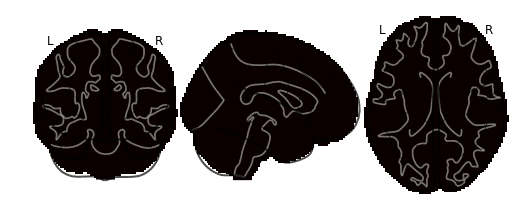

In [35]:
plot_glass_brain(nb.Nifti1Image(new_standard_mask_data, resampled_nii.affine, resampled_nii.header))

In [49]:
for id in redo:
    !rm -rf images/fake_maps/{"%04d"%id}

In [48]:
564 in redo

True